*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall24/notebooks/module03_01_nn_to_regression.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Nearest Neighbor Regression

In this notebook we introduce the idea of using the nearest neighbor algorithm for regression problems.

In [1]:
import numpy as np
from matplotlib import pylab as plt

## Regression problems

So far our attention has been solely focused on classification problems, namely a choice between a discrete set of labels. While many problems are of this kind, we also need to be aware of **regression**.

Shortly we will use our knowledge of nearest neighbors algorithms to present a slightly non-conventional introduction to regresion. But first, here is the essential distinction between a classification and a regression problem. 

The most succinct mathematical definition of a classification problem is as follows.

**Classification**: Learn a mapping of from *feature vectors* to a set of *discrete labels* i.e. a function

$$ f  : \mathbb{R}^d \longrightarrow \mathbb{C}   $$

The domain of the function is $\mathbb{R}^d$, i.e. a real-valued point in $d$ dimensions. The range of the function consists of a set of discrete labels $\mathbb{C}$. For example, for a binary classification problem with two classes labeled *cat* and *dog*:  

$$  \mathbb{C} = \left\{ \hbox{cat}, \hbox{dog} \right\} $$

However, as we've already seen, machine learning folks are happy to replace labels with integers, essentially creating an arbitray mapping from labels to integers.

$$ \begin{eqnarray}
   \hbox{cat} & \rightarrow & 0 \\
   \hbox{dog} & \rightarrow & 1
   \end{eqnarray}
$$

With this mapping agreed upon the problem now is expressed as:

$$ f  : \mathbb{R}^d \longrightarrow \{0, 1\}  $$

So far so good, but let's think a bit about the step of mapping to integers.

While convenient, this step is potentially misleading. To understand why, just ask yourself what happens if you add a third class *bird*, and associate it with the integer $2$.

$$ \begin{eqnarray}
   \hbox{cat} & \rightarrow & 0 \\
   \hbox{dog} & \rightarrow & 1 \\
   \hbox{bird} & \rightarrow & 2
   \end{eqnarray}
$$

Does it matter what integer you assign to bird? Are birds somehow better suited to the integer $2$ than $1$ or $0$?  We also did not mean to suggest that a *cat* is twice as far away from a *bird* than is a *dog* (although keeping the cat away from the bird may increase the lifespan of the bird.)
In other words, the choice of integers is arbitrary!

Now, what if in our problem of interest we are trying to predict numbers and those numbers have meaning?  In this case we have a regression problem:

**Regression**: Learn a mapping from *feature vectors* to a set of *continuous labels*, i.e. a function

$$ f  : \mathbb{R}^d \longrightarrow \mathbb{R}   $$

In the case of regression, the use of numbers in the range of the function $f$ is a direct reflection of the problem being solved, where that value has meaning such the wind speed of a hurricane or tomorrow's temperature.

## Nearest neighbors for regression

Recall the nearest neighbor classifier:

```
Nearest neighbor classifier

- Find the example in the training data that is closest to
  the example that needs to be classified.
- Return its label
```

We can easily turn this classifier into a regression method.  In-fact, there is nothing that need change in our implementation - by returning the label of the nearest neighbor, it's already a regression method! So, note the code below matches exactly the code in our previous notebook on nearest neighbor classifiers. 

In [2]:
def distance(x1, x2):
    return np.sqrt(np.dot(x1-x2, x1-x2))

class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = [distance(x, self.X[i]) for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]

To illustrate that, let's run the algorithm on a simple one-dimensional regression problem:

shape of training data:  (40, 1) (40,)


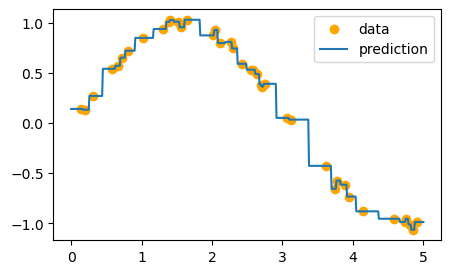

In [3]:
from numpy.random import default_rng
num_examples = 40
rng = default_rng(1)
X = np.sort(5 * rng.random(num_examples))
y = np.sin(X) + rng.normal(0, 0.05, size=(len(X)))
X = X[:, np.newaxis]
print("shape of training data: ", X.shape, y.shape)

nn = nearest_neighbor()
nn.fit(X, y)

X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])
plt.figure(figsize=(5,3))
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_test, y_pred, label='prediction')

plt.legend();